![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

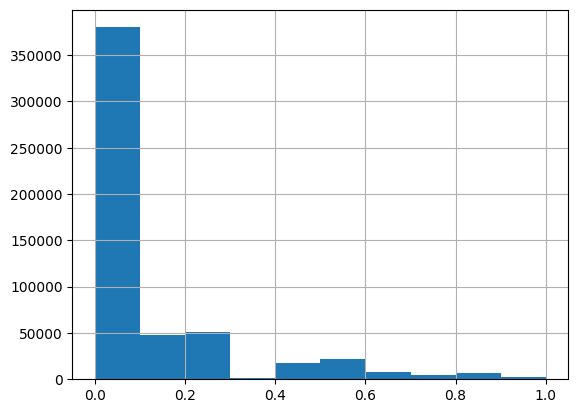

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text
X

0         What are you talking about? What group do Pete...
1          NO!, Let him, we need a Conservative government.
2         Perhaps he took the "power out of the Cardinal...
3         As always, yours is dripping with sarcasm, whi...
4         The dirty little secret is that the price rang...
                                ...                        
541457    You wrote: "Both parties campaigned explicitly...
541458    Nowadays. there sure seem to be a lot of credi...
541459    We are lucky wealth filters down to the poor i...
541460    You are half right. Both nature and humans can...
541461    I don't know how you went from yelling at a fo...
Name: comment_text, Length: 541462, dtype: object

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer a partir de X


In [40]:
vect_A = CountVectorizer()
X_dtm_A = vect_A.fit_transform(X)

In [41]:
X_dtm_A

<541462x171853 sparse matrix of type '<class 'numpy.int64'>'
	with 20869096 stored elements in Compressed Sparse Row format>

In [42]:
# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_dtm_A, y)

# Predicción de probabilidades de toxicidad en los datos de prueba
y_pred = model.predict(vect_A.transform(X_test))

# Cálculo del MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.015407081590419237


In [43]:
vect_A.vocabulary_

{'what': 165911,
 'are': 16977,
 'you': 169924,
 'talking': 149445,
 'about': 10044,
 'group': 69318,
 'do': 49535,
 'peter': 116579,
 'christy': 34545,
 'and': 14976,
 'dominique': 49967,
 'belong': 22966,
 'to': 153445,
 'not': 107867,
 'aware': 19703,
 'of': 109638,
 'any': 15944,
 'why': 166602,
 'still': 145426,
 'hiding': 73629,
 'behind': 22693,
 'pseudonym': 123056,
 'no': 107080,
 'let': 91095,
 'him': 73951,
 'we': 165011,
 'need': 105556,
 'conservative': 38924,
 'government': 68177,
 'perhaps': 116076,
 'he': 72238,
 'took': 153875,
 'the': 151333,
 'power': 120264,
 'out': 112105,
 'cardinal': 31110,
 'hands': 71157,
 'avoid': 19632,
 'semblance': 136905,
 'undue': 158918,
 'influence': 79900,
 'over': 112451,
 'investigation': 81722,
 'is': 82200,
 'it': 82512,
 'immediate': 78154,
 'reaction': 126288,
 'posters': 119977,
 'here': 73167,
 'jump': 84905,
 'rash': 125855,
 'judgment': 84773,
 'without': 167485,
 'all': 13628,
 'facts': 58720,
 'time': 152999,
 'matter': 971

In [44]:
X_dtm_A.shape

(541462, 171853)

In [45]:
print(vect_A.get_feature_names_out()[-150:-100])

['𝗰𝗮𝗿𝗲𝗳𝘂𝗹' '𝗱𝗼' '𝗱𝗼𝗹𝗹𝗮𝗿𝘀' '𝗳𝗿𝗼𝗺' '𝗳𝗿𝗼𝗻𝘁' '𝗳𝘂𝗹𝗹' '𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' '𝗴𝗶𝘃𝗲'
 '𝗵𝗮𝘃𝗲' '𝗵𝗲𝗮𝘃𝗲𝗻' '𝗵𝗼𝗻𝗼𝗿𝗲𝗱' '𝗵𝘁𝘁𝗽𝘀' '𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀' '𝗶𝗻' '𝗶𝘁' '𝗻𝗲𝗲𝗱𝘆' '𝗻𝗼'
 '𝗻𝗼𝘁' '𝗼𝗳' '𝗼𝗻' '𝗼𝘁𝗵𝗲𝗿𝘀' '𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲' '𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱' '𝗿𝗲𝘄𝗮𝗿𝗱' '𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀'
 '𝘀𝗲𝗲𝗻' '𝘀𝘁𝗿𝗲𝗲𝘁𝘀' '𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀' '𝘁𝗲𝗹𝗹' '𝘁𝗵𝗲' '𝘁𝗵𝗲𝗶𝗿' '𝘁𝗵𝗲𝗺' '𝘁𝗵𝗲𝘆' '𝘁𝗼'
 '𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀' '𝘄𝗵𝗲𝗻' '𝘄𝗶𝗹𝗹' '𝘄𝗶𝘁𝗵' '𝘆𝗼𝘂' '𝘆𝗼𝘂𝗿' '𝘆𝗼𝘂𝘁𝘂' '𝘊𝘦𝘳𝘢𝘵𝘰𝘤𝘺𝘴𝘵𝘪𝘴'
 '𝘊𝘩𝘦𝘤𝘬' '𝘢𝘴' '𝘣𝘦' '𝘣𝘺' '𝘥𝘢𝘵𝘦' '𝘧𝘪𝘮𝘣𝘳𝘪𝘢𝘵𝘢' '𝘧𝘰𝘶𝘯𝘥' '𝘰𝘶𝘵𝘥𝘢𝘵𝘦𝘥']


In [46]:
from sklearn.metrics import mean_squared_error

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.015407081590419237


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [47]:

# Creación de matrices de documentos usando CountVectorizer con trigramas
vect_B = CountVectorizer(ngram_range=(3, 3))
X_dtm_B_train = vect_B.fit_transform(X_train)
X_dtm_B_test = vect_B.transform(X_test)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_dtm_B_train, y_train)

# Predicción de probabilidades de toxicidad en los datos de prueba
y_pred_B = model.predict(X_dtm_B_test)

# Cálculo del MSE
mse_B = mean_squared_error(y_test, y_pred_B)
print("MSE utilizando trigramas:", mse_B)


MSE utilizando trigramas: 0.03980335613865845


In [48]:
X_dtm_B_train.shape

(362779, 10546378)

In [49]:
print(vect_B.get_feature_names_out()[-150:-100])

['𝗵𝗼𝗻𝗼𝗿𝗲𝗱 𝗯𝘆 𝗼𝘁𝗵𝗲𝗿𝘀' '𝗵𝘁𝘁𝗽𝘀 𝘆𝗼𝘂𝘁𝘂 𝗯𝗲' '𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀 𝗱𝗼 𝗶𝗻' '𝗶𝗻 𝗳𝗿𝗼𝗻𝘁 𝗼𝗳'
 '𝗶𝗻 𝗳𝘂𝗹𝗹 matthew' '𝗶𝗻 𝗵𝗲𝗮𝘃𝗲𝗻 𝗦𝗼' '𝗶𝗻 𝘁𝗵𝗲 𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀' '𝗶𝘁 𝘄𝗶𝘁𝗵 𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀'
 '𝗻𝗲𝗲𝗱𝘆 𝗱𝗼 𝗻𝗼𝘁' '𝗻𝗼 𝗿𝗲𝘄𝗮𝗿𝗱 𝗳𝗿𝗼𝗺' '𝗻𝗼𝘁 𝗮𝗻𝗻𝗼𝘂𝗻𝗰𝗲 𝗶𝘁' '𝗻𝗼𝘁 𝘁𝗼 𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲'
 '𝗼𝗳 𝗼𝘁𝗵𝗲𝗿𝘀 𝘁𝗼' '𝗼𝗻 𝘁𝗵𝗲 𝘀𝘁𝗿𝗲𝗲𝘁𝘀' '𝗼𝘁𝗵𝗲𝗿𝘀 𝗧𝗿𝘂𝗹𝘆 𝘁𝗲𝗹𝗹' '𝗼𝘁𝗵𝗲𝗿𝘀 𝘁𝗼 𝗯𝗲'
 '𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲 𝘆𝗼𝘂𝗿 𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀' '𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱 𝘁𝗵𝗲𝗶𝗿 𝗿𝗲𝘄𝗮𝗿𝗱' '𝗿𝗲𝘄𝗮𝗿𝗱 𝗳𝗿𝗼𝗺 𝘆𝗼𝘂𝗿'
 '𝗿𝗲𝘄𝗮𝗿𝗱 𝗶𝗻 𝗳𝘂𝗹𝗹' '𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀 𝗶𝗻 𝗳𝗿𝗼𝗻𝘁' '𝘀𝗲𝗲𝗻 𝗯𝘆 𝘁𝗵𝗲𝗺' '𝘀𝘁𝗿𝗲𝗲𝘁𝘀 𝘁𝗼 𝗯𝗲'
 '𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀 𝗮𝗻𝗱 𝗼𝗻' '𝘁𝗲𝗹𝗹 𝘆𝗼𝘂 𝘁𝗵𝗲𝘆' '𝘁𝗵𝗲 𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀 𝗱𝗼' '𝘁𝗵𝗲 𝗻𝗲𝗲𝗱𝘆 𝗱𝗼'
 '𝘁𝗵𝗲 𝘀𝘁𝗿𝗲𝗲𝘁𝘀 𝘁𝗼' '𝘁𝗵𝗲 𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀 𝗮𝗻𝗱' '𝘁𝗵𝗲𝗶𝗿 𝗿𝗲𝘄𝗮𝗿𝗱 𝗶𝗻' '𝘁𝗵𝗲𝗺 𝗜𝗳 𝘆𝗼𝘂'
 '𝘁𝗵𝗲𝘆 𝗵𝗮𝘃𝗲 𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱' '𝘁𝗼 𝗯𝗲 𝗵𝗼𝗻𝗼𝗿𝗲𝗱' '𝘁𝗼 𝗯𝗲 𝘀𝗲𝗲𝗻' '𝘁𝗼 𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲 𝘆𝗼𝘂𝗿'
 '𝘁𝗼 𝘁𝗵𝗲 𝗻𝗲𝗲𝗱𝘆' '𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀 𝗮𝘀 𝘁𝗵𝗲' '𝘄𝗵𝗲𝗻 𝘆𝗼𝘂 𝗴𝗶𝘃𝗲' '𝘄𝗶𝗹𝗹 𝗵𝗮𝘃𝗲 𝗻𝗼'
 '𝘄𝗶𝘁𝗵 𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀 𝗮𝘀' '𝘆𝗼𝘂 𝗱𝗼 𝘆𝗼𝘂' '𝘆𝗼𝘂 𝗴𝗶𝘃𝗲 𝘁𝗼' '𝘆𝗼𝘂 𝘁𝗵𝗲𝘆 𝗵𝗮𝘃𝗲'
 '𝘆𝗼𝘂 𝘄𝗶𝗹𝗹 𝗵𝗮𝘃𝗲' '𝘆𝗼𝘂𝗿 𝗙𝗮𝘁𝗵𝗲𝗿 𝗶𝗻' '𝘆𝗼𝘂𝗿 𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀 𝗶𝗻'
 '𝘆𝗼𝘂𝘁𝘂 𝗯𝗲 𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' '𝘊𝘩𝘦𝘤𝘬 𝘶𝘴𝘦 𝘣𝘺' '𝘢𝘴 𝘴𝘰𝘮𝘦 𝘱𝘳𝘪𝘰𝘳' '𝘣𝘦 𝘰𝘶𝘵𝘥𝘢𝘵𝘦𝘥 𝘸𝘩𝘦𝘯']


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

TfidfVectorizer es una técnica de tokenización que se usa generalmente para el procesamiento de texto, esta convierte colecciones de documentos en representaciones numéricas que los modelos de aprendizaje automático pueden entender. La sigla "TF-IDF" significa "Term Frequency-Inverse Document Frequency".

La frecuencia de Término (TF), mide la frecuencia de una palabra en un documento específico. Cuantas más veces aparezca una palabra en un documento, mayor será su valor de TF para ese documento; y la dfecuencia Inversa de Documento (IDF) mide la importancia de una palabra en el conjunto de documentos, palabras que aparecen en muchos documentos tendrán un valor de IDF más bajo, mientras que palabras que aparecen en pocos documentos tendrán un valor de IDF más alto.

### Ventajas:

* Penalización de términos comunes: TfidfVectorizer penaliza los términos que aparecen en muchos documentos, lo que ayuda a destacar términos más informativos.
* Robustez ante documentos largos: TfidfVectorizer es más robusto que CountVectorizer cuando se trata de documentos de diferentes longitudes, ya que normaliza la frecuencia de términos por la longitud del documento.
* Útil para términos específicos: Es útil para resaltar términos específicos en documentos grandes o colecciones de documentos.

### Desventajas:

* Requiere más cómputo: El cálculo del IDF puede ser costoso computacionalmente para grandes conjuntos de datos.
* Más difícil de interpretar: A veces puede ser más difícil de interpretar que CountVectorizer debido a la transformación TF-IDF.
* Menos útil para modelos simples: En algunos casos, la simplicidad de contar términos con CountVectorizer puede ser preferible, especialmente para modelos más simples como Naive Bayes.

En comparativa con el CountVectorizer, TfidfVectorizer es una técnica más avanzada, que puede ser útil para resaltar términos importantes en un corpus de texto, especialmente en conjuntos de datos grandes o en la presencia de documentos de diferentes longitudes. Todo esto dependiendo del contexto y de las necesidades específicas del problema.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [50]:

# Creación de matrices de documentos usando TfidfVectorizer
vect_C = TfidfVectorizer()
X_dtm_C_train = vect_C.fit_transform(X_train)
X_dtm_C_test = vect_C.transform(X_test)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_dtm_C_train, y_train)

# Predicción de probabilidades de toxicidad en los datos de prueba
y_pred_C = model.predict(X_dtm_C_test)

# Cálculo del MSE
mse_C = mean_squared_error(y_test, y_pred_C)
print("MSE utilizando TfidfVectorizer:", mse_C)


MSE utilizando TfidfVectorizer: 0.028002693193180425


In [51]:
X_dtm_C_train.shape

(362779, 141176)

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

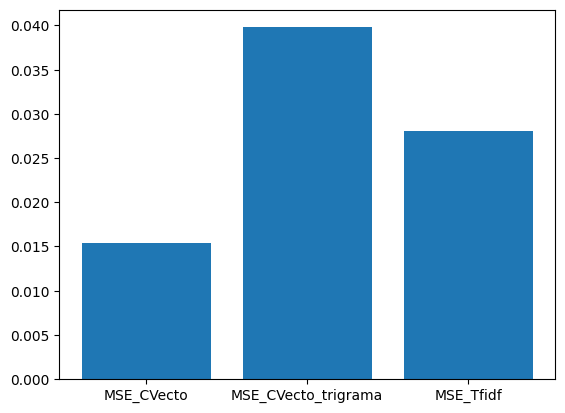

In [52]:
# Celda 5

import matplotlib.pyplot as plt


categorias = ['MSE_CVecto', 'MSE_CVecto_trigrama', 'MSE_Tfidf']
valores = [mse, mse_B, mse_C]
plt.bar(categorias, valores)

plt.show()

Con base en los resultados del MSE, el modelo que mejor resultado tiene es el de Tokenización con CountVectorizer, sin indicar ninguna modificación a los parámetros por defecto establecidos. 

El peor desempeño lo obtiene el modelo en el que se uitilizó CountVectorizer, pero en donde se indicó por parámetro, que formara trigramas. En este último se formaron grupos de tres palabras, lo que aumentó la dimensionalidad de características o columnas de 171.853 a 10.546.378 (10.374.525 de diferencia) y disminuyo el número de filas de 541.462 a 362.779 (178.683 de diferencia). Esto aumentó la complejidad del modelo, añadiendo dimensionalidad, lo que pudo ocasionar sobreajuste. Además, los trigramas, al ser grupos de tres palabras, pueden agrupar palabras que no son relevantes en el contexto y aumentar así el ruido, haciendo que el modelo no identifique correctamente las palabras o combinaciones que indiquen toxicidad. 

El modelo con tokenización por TfidfVectorizer, obtuvo menor complejidad, teniendo la menor dimensionalidad de todos. No obstante, su rendimiento lo posiciona en la mitad. Dentro de las ventajas que se mencionaron sobre este tipo de tokenización, se encontraba que ayudaba penalizando términos comunes y a ponerle frecuencias a los parámetros más utilizados, pero esto para el ejercicio puede no ser beneficioso, ya que puede penalizar términos que sean importantes para la predicción y, por otro lado, asignar frecuencias bajas a los términos que se requieren para detectar toxicidad, ya que se presentan poco en el texto, y cómo se vio en la exploración de datos, los comentarios que pueden llegar a ser tóxicos, tiene poca presencia. Por lo que para este ejercicio resulta mejor utilizar un tokenización con CountVectorizer y su rendimiento podría mejorar haciendo una búsqueda de hiperparámetros. 
